Image Compression using SVD


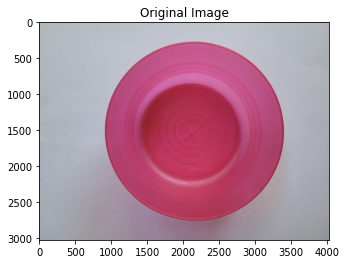

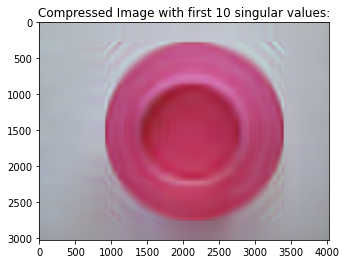

original size:
786432
compressed size:
30750
Ratio compressed size / original size:
0.03910064697265625
Compressed image size is 3.91% of the original image 


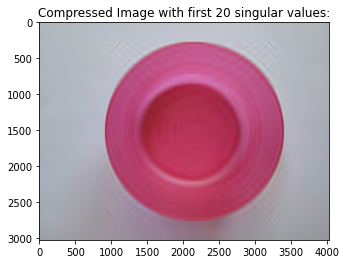

original size:
786432
compressed size:
61500
Ratio compressed size / original size:
0.0782012939453125
Compressed image size is 7.82% of the original image 


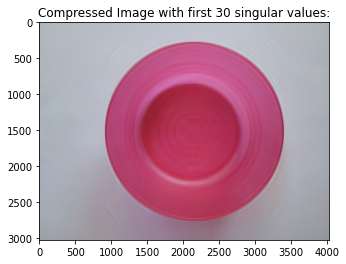

original size:
786432
compressed size:
92250
Ratio compressed size / original size:
0.11730194091796875
Compressed image size is 11.73% of the original image 


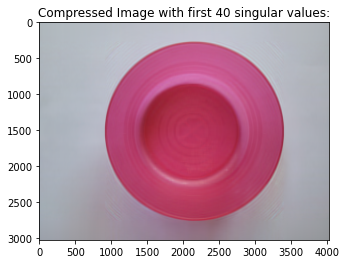

original size:
786432
compressed size:
123000
Ratio compressed size / original size:
0.156402587890625
Compressed image size is 15.64% of the original image 


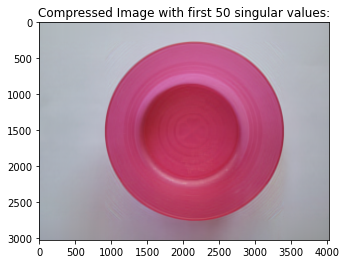

original size:
786432
compressed size:
153750
Ratio compressed size / original size:
0.19550323486328125
Compressed image size is 19.55% of the original image 


In [1]:
import numpy
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# open the image and return 3 matrices, each corresponding to one channel (R, G and B channels)
def openImage(imagePath):
    imOrig = Image.open(imagePath)
    im = numpy.array(imOrig)
    aRed = im[:, :, 0]
    aGreen = im[:, :, 1]
    aBlue = im[:, :, 2]
    
    return [aRed, aGreen, aBlue, imOrig]

# compress the matrix of a single channel
def compressSingleChannel(channelDataMatrix, singularValuesLimit):
    uChannel, sChannel, vhChannel = numpy.linalg.svd(channelDataMatrix)
    aChannelCompressed = numpy.zeros((channelDataMatrix.shape[0], channelDataMatrix.shape[1]))
    k = singularValuesLimit

    leftSide = numpy.matmul(uChannel[:, 0:k], numpy.diag(sChannel)[0:k, 0:k])
    aChannelCompressedInner = numpy.matmul(leftSide, vhChannel[0:k, :])
    aChannelCompressed = aChannelCompressedInner.astype('uint8')
    return aChannelCompressed

# MAIN PROGRAM:
print('Image Compression using SVD')
aRed, aGreen, aBlue, originalImage = openImage('plastic.jpg')

# image width and height:
imageWidth = 512
imageHeight = 512

plt.title("Original Image")
plt.imshow(originalImage)
plt.show()

for singular_values in [10,20,30,40,50]:
    
    # number of singular values to use for reconstructing the compressed image
    singularValuesLimit = singular_values
    
    aRedCompressed = compressSingleChannel(aRed, singularValuesLimit)
    aGreenCompressed = compressSingleChannel(aGreen, singularValuesLimit)
    aBlueCompressed = compressSingleChannel(aBlue, singularValuesLimit)

    imr = Image.fromarray(aRedCompressed, mode=None)
    img = Image.fromarray(aGreenCompressed, mode=None)
    imb = Image.fromarray(aBlueCompressed, mode=None)

    newImage = Image.merge("RGB", (imr, img, imb))
    
    plt.title("Compressed Image with first %d singular values:" %singular_values)
    plt.imshow(newImage,  cmap = 'gray')
    plt.show()

    # CALCULATE AND DISPLAY THE COMPRESSION RATIO
    mr = imageHeight
    mc = imageWidth

    originalSize = mr * mc * 3
    compressedSize = singularValuesLimit * (1 + mr + mc) * 3

    print('original size:')
    print(originalSize)

    print('compressed size:')
    print(compressedSize)

    print('Ratio compressed size / original size:')
    ratio = compressedSize * 1.0 / originalSize
    print(ratio)

    print('Compressed image size is ' + str(round(ratio * 100, 2)) + '% of the original image ')

In [2]:
pip install --upgrade Pillow

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached Pillow-9.3.0-cp39-cp39-macosx_10_10_x86_64.whl (3.3 MB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.1.1
    Uninstalling Pillow-9.1.1:
ERROR: Could not install packages due to an OSError: Cannot move the non-empty directory '/usr/local/lib/python3.9/site-packages/PIL/': Lacking write permission to '/usr/local/lib/python3.9/site-packages/PIL/'.

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from PIL import Image

image = Image.open('plastic.jpg')

In [4]:
image.show()

In [5]:
# Image size, in pixels. The size is given as a 2-tuple (width, height).
print(image.size)
w1, h1 = image.size
pro1 = (w1*h1*3)/1024


(4032, 3024)


In [6]:
image.thumbnail((640, 640))
image.save('plastic_compressed.jpg')
compressed = Image.open('plastic_compressed.jpg')
print(image.size)
w2, h2 = image.size
pro2 = (w2*h2*3)/1024

(640, 480)


In [7]:
ratio = pro2 * 1.0 / pro1


Memory used for original image: 35721 KB
Memory used for compressed image: 900 KB
Compressed image size is 2.52% of the original image 


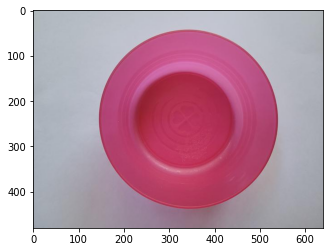

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(compressed)
print("Memory used for original image:",round(pro1),"KB")
print("Memory used for compressed image:",round(pro2),"KB")
print('Compressed image size is ' + str(round(ratio * 100, 2)) + '% of the original image ')
plt.show()

In [9]:
image = Image.open('glass.jpg')
image.thumbnail((400, 400))
image.save('glass_compressed.jpg')
compressed = Image.open('glass_compressed.jpg')

image_rot_180 = compressed.rotate(180)
image_rot_180.save('plastic_180.jpg')
print("Compressed image rotated 180 degrees")


Compressed image rotated 180 degrees


In [10]:
image_flip = image.transpose(Image.FLIP_LEFT_RIGHT)
image_flip.save('image_flip.jpg')

/var/folders/tn/85m5przx5qd15z983d952z0m0000gq/T/ipykernel_6965/1751751195.py:1: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  image_flip = image.transpose(Image.FLIP_LEFT_RIGHT)


Size(dimension) of Original Image: 4032 3024


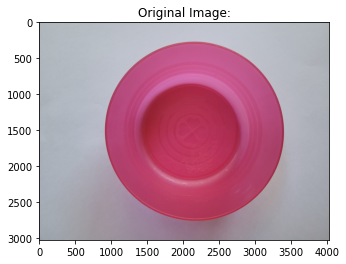

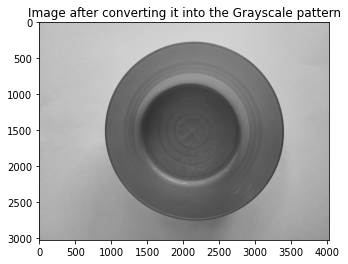

In [11]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

path = 'plastic.jpg'
img = Image.open(path)
s = float(os.path.getsize(path))/1000
plt.title("Original Image:")
plt.imshow(img)

# image width and height:
m,n = img.size
print("Size(dimension) of Original Image:", m,n)
imggray = img.convert('L')
imgmat = np.array( list(imggray.getdata(band = 0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure()
plt.imshow(imgmat, cmap = 'gray')
plt.title("Image after converting it into the Grayscale pattern")
plt.show()

In [12]:
from PIL import Image, ImageEnhance
color = ImageEnhance.Color(img)
color.enhance(1.5).save('plastic_normal_color.jpg')